# Early Stopping, Logistic Regression and Decision Boundaries

# EarlyStopping

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor, LogisticRegression
from sklearn.model_selection import train_test_split
from copy import deepcopy


from sklearn.datasets import load_iris

In [12]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [9]:
def root_mean_squared_error(labels, predictions):
    return mean_squared_error(labels, predictions, squared =False)

In [3]:
np.random.seed(42)

m = 100
X = 6*np.random.rand(m, 1) - 3
y =  0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m//2], y[:m//2,0]
X_valid, y_valid = X[m//2:], y[m//2:, 0]

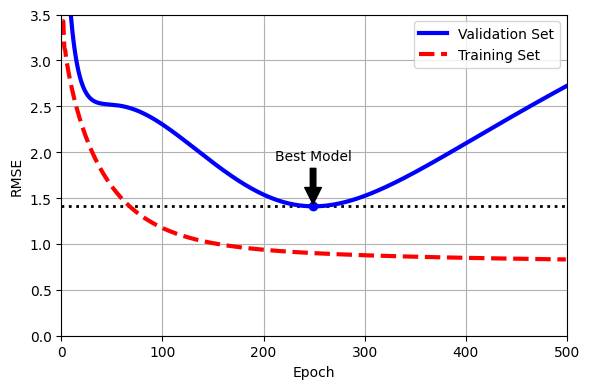

In [20]:
preprocessing = make_pipeline(PolynomialFeatures(degree = 90, include_bias = False),
                              StandardScaler())

X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)

sgd_reg = SGDRegressor(penalty = None, eta0= 0.002, random_state = 42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []


for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_valid, y_valid_predict)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = root_mean_squared_error(y_train, y_train_predict)
    val_errors.append(val_error)
    train_errors.append(train_error)

best_epoch = np.argmin(val_errors)
plt.figure(figsize = (6, 4))
plt.annotate(
    "Best Model",
    xy = (best_epoch, best_valid_rmse),
    xytext = (best_epoch, best_valid_rmse + 0.5),
    ha = "center",
    arrowprops = dict(facecolor = "black", shrink = 0.05))

plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth = 2)
plt.plot(val_errors, "b-", linewidth = 3, label = "Validation Set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth = 3, label = "Training Set")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.legend(loc = "upper right")
plt.grid()
save_fig("early_stopping_plot")

# Logistic Regerssion

## Estimating Probabilites

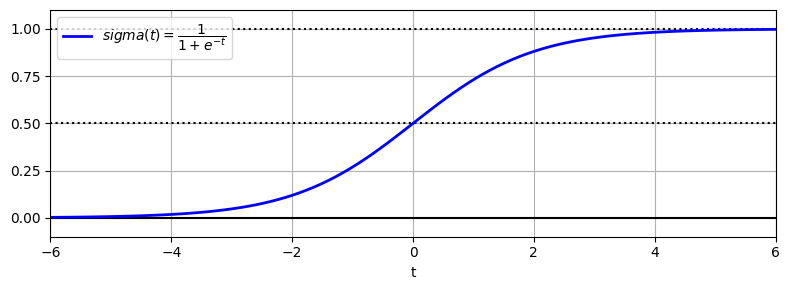

In [23]:
lim = 6
t = np.linspace(-lim, lim , 100)
sig =  1 / (1 + np.exp(-t))


plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, -1.1], "k-")
plt.plot(t, sig, "b-", linewidth = 2, label = r"$sigma(t) = \dfrac{1}{1 + e^{-t}}$" )
plt.xlabel("t")
plt.legend(loc = "upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
save_fig("logistic_function_plot");

# Decision Boundaries

In [25]:
iris = load_iris(as_frame = True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [26]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [27]:
iris.data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
iris.target.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [29]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [33]:
X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] =="virginica"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

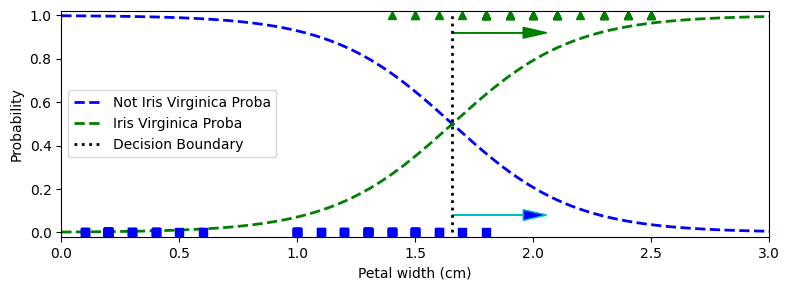

In [43]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]


plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label = "Not Iris Virginica Proba")
plt.plot(X_new, y_proba[:,1], "g--", linewidth = 2, label = "Iris Virginica Proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth = 2, label = "Decision Boundary")

plt.arrow(x = decision_boundary, y=0.08, dx = 0.3, dy=0,
         head_width = 0.05, head_length = 0.1, fc = "b", ec="c")
plt.arrow(x = decision_boundary, y = 0.92, dx=0.3, dy=0,
        head_width = 0.05, head_length=0.1, fc="g", ec="g")

plt.plot(X_train[y_train==0], y_train[y_train==0], "bs")
plt.plot(X_train[y_train==1], y_train[y_train==1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc = "center left")
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")

In [44]:
decision_boundary

1.6576576576576576

In [45]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

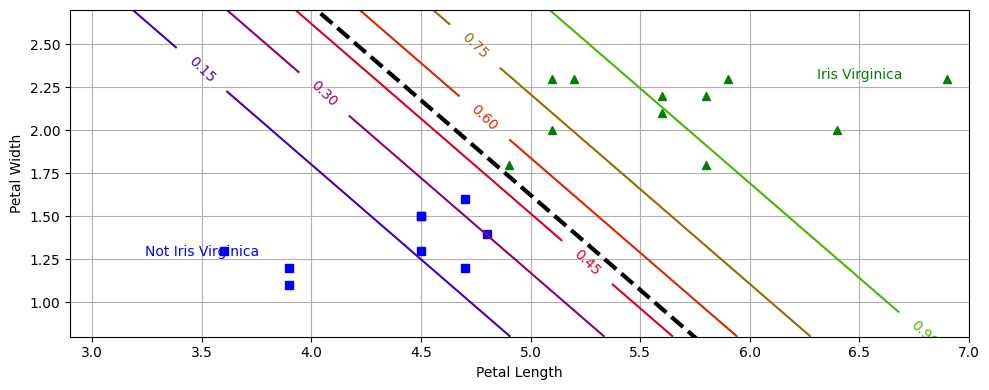

In [49]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target]=="virginica"
X_train, X_train, y_train, y_train = train_test_split(X, y, test_size= 0.2, random_state=42)

log_reg =LogisticRegression(C = 2, random_state= 42)
log_reg.fit(X_train, y_train)

x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                    np.linspace(0.8, 2.7, 200).reshape(-1, 1))

X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:,1].reshape(x0.shape)

left_right  =np.array([2.9, 7])
boundary = -((log_reg.coef_[0,0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0,1])

plt.figure(figsize =(10,4))
plt.plot(X_train[y_train ==0, 0], X_train[y_train == 0,1], "bs")
plt.plot(X_train[y_train == 1, 0],X_train[y_train == 1,1 ], "g^")
contour = plt.contour(x0, x1, zz, cmap = plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris Virginica", color ="b", ha= "center")
plt.text(6.5, 2.3, "Iris Virginica", color ="g", ha ="center")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
save_fig("logistic_regression_contour_plot")